## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

## Importing Cleaned Data and Test Dataset

In [2]:
final_train = pd.read_csv('datasets/final_train_cleaned.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
test.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

The dataset will have to be cleaned and the null values treated the same way as the training dataset to ensure consistency when the model is used for prediction.

In [5]:
def clean(data):
    test.columns = test.columns.str.lower()
    test.columns = test.columns.str.replace(' ', '_')
    
    return data

In [6]:
clean(test)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


In [7]:
test = test.drop(['id', 'pid'], axis = 1)

In [8]:
def missing_pct(data):
    nan_pct = 100 * test.isnull().sum() / len(test)
    nan_pct = nan_pct[nan_pct > 0].sort_values()
    return nan_pct

In [9]:
pct_nan = missing_pct(test)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'electrical'),
  Text(1, 0, 'mas_vnr_type'),
  Text(2, 0, 'mas_vnr_area'),
  Text(3, 0, 'bsmt_qual'),
  Text(4, 0, 'bsmt_cond'),
  Text(5, 0, 'bsmt_exposure'),
  Text(6, 0, 'bsmtfin_type_1'),
  Text(7, 0, 'bsmtfin_type_2'),
  Text(8, 0, 'garage_type'),
  Text(9, 0, 'garage_cond'),
  Text(10, 0, 'garage_qual'),
  Text(11, 0, 'garage_finish'),
  Text(12, 0, 'garage_yr_blt'),
  Text(13, 0, 'lot_frontage'),
  Text(14, 0, 'fireplace_qu'),
  Text(15, 0, 'fence'),
  Text(16, 0, 'alley'),
  Text(17, 0, 'misc_feature'),
  Text(18, 0, 'pool_qc')])

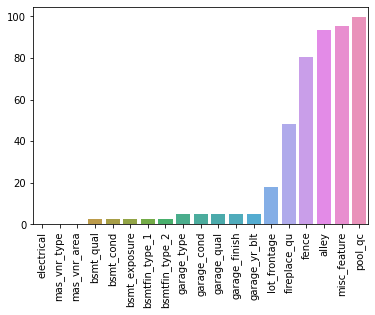

In [10]:
sns.barplot(x = pct_nan.index, y = pct_nan)
plt.xticks(rotation = 90)

In [11]:
bsmt_num = ['total_bsmt_sf', 'bsmt_unf_sf', 'bsmtfin_sf_2', 'bsmtfin_sf_1', 'bsmt_full_bath', 'bsmt_half_bath']
garage_num = ['garage_yr_blt', 'garage_cars', 'garage_area']

test[bsmt_num] = test[bsmt_num].fillna(0)
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0)
test[garage_num] = test[garage_num].fillna(0)
test['lot_frontage'] = test['lot_frontage'].fillna(test['lot_frontage'].mean())

In [12]:
bsmt_str = ['bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2', 'bsmt_exposure']
garage_str = ['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']

test[bsmt_str] = test[bsmt_str].fillna('None')
test[garage_str] = test[garage_str].fillna('None')

In [13]:
test['mas_vnr_type'] = test['mas_vnr_type'].fillna('None')
test['fireplace_qu'] = test['fireplace_qu'].fillna('None')

In [14]:
pct_nan = missing_pct(test)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'electrical'),
  Text(1, 0, 'fence'),
  Text(2, 0, 'alley'),
  Text(3, 0, 'misc_feature'),
  Text(4, 0, 'pool_qc')])

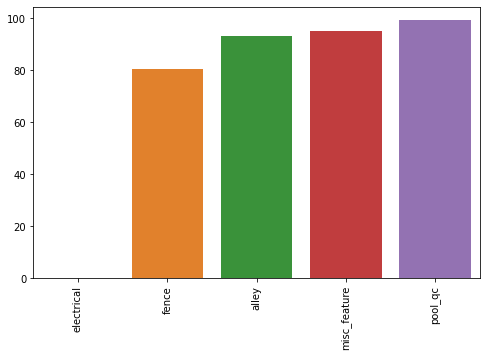

In [15]:
plt.figure(figsize = (8,5))
sns.barplot(x = pct_nan.index, y = pct_nan)
plt.xticks(rotation = 90)

In [16]:
test = test.drop(['fence', 'alley', 'misc_feature', 'pool_qc'], axis = 1)

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      878 non-null    int64  
 1   ms_zoning        878 non-null    object 
 2   lot_frontage     878 non-null    float64
 3   lot_area         878 non-null    int64  
 4   street           878 non-null    object 
 5   lot_shape        878 non-null    object 
 6   land_contour     878 non-null    object 
 7   utilities        878 non-null    object 
 8   lot_config       878 non-null    object 
 9   land_slope       878 non-null    object 
 10  neighborhood     878 non-null    object 
 11  condition_1      878 non-null    object 
 12  condition_2      878 non-null    object 
 13  bldg_type        878 non-null    object 
 14  house_style      878 non-null    object 
 15  overall_qual     878 non-null    int64  
 16  overall_cond     878 non-null    int64  
 17  year_built      

In [18]:
cat_test = test.select_dtypes(include = 'object')
num_test = test.select_dtypes(exclude = 'object')

In [19]:
cat_test = pd.get_dummies(cat_test, drop_first = True)

In [20]:
cat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Columns: 195 entries, ms_zoning_FV to sale_type_WD 
dtypes: uint8(195)
memory usage: 167.3 KB


In [21]:
num_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      878 non-null    int64  
 1   lot_frontage     878 non-null    float64
 2   lot_area         878 non-null    int64  
 3   overall_qual     878 non-null    int64  
 4   overall_cond     878 non-null    int64  
 5   year_built       878 non-null    int64  
 6   year_remod/add   878 non-null    int64  
 7   mas_vnr_area     878 non-null    float64
 8   bsmtfin_sf_1     878 non-null    int64  
 9   bsmtfin_sf_2     878 non-null    int64  
 10  bsmt_unf_sf      878 non-null    int64  
 11  total_bsmt_sf    878 non-null    int64  
 12  1st_flr_sf       878 non-null    int64  
 13  2nd_flr_sf       878 non-null    int64  
 14  low_qual_fin_sf  878 non-null    int64  
 15  gr_liv_area      878 non-null    int64  
 16  bsmt_full_bath   878 non-null    int64  
 17  bsmt_half_bath  

In [22]:
final_test = pd.concat([num_test,cat_test], axis = 1)

In [23]:
final_test

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,190,69.000000,9142,6,8,1910,1950,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,90,69.545961,9662,5,4,1977,1977,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,60,58.000000,17104,7,5,2006,2006,0.0,554,0,...,1,0,0,0,0,0,1,0,0,0
3,30,60.000000,8520,5,6,1923,2006,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20,69.545961,9500,6,5,1963,1963,247.0,609,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,60,80.000000,8000,6,6,1974,1974,0.0,931,153,...,1,0,0,0,0,0,0,0,0,1
874,60,90.000000,14670,6,7,1966,1999,410.0,575,0,...,1,0,0,0,0,0,0,0,0,1
875,20,55.000000,8250,5,5,1968,1968,0.0,250,492,...,1,0,0,0,0,0,0,0,0,1
876,20,60.000000,9000,4,6,1971,1971,0.0,616,0,...,1,0,0,0,0,0,0,0,0,1


After the catergorical columns were dummified, the columns between the training and test dataset did not seem to coincide, hence additional checks were done to make sure that the shape of both datasets are the same.

In [24]:
add = []

for i in final_train.columns:
    if i not in final_test.columns:
        add.append(i)

In [25]:
append = pd.DataFrame(columns = add)

In [26]:
final_test = pd.concat([final_test,append], axis = 0)

In [27]:
final_test

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,exterior_2nd_Stone,bsmt_cond_Fa,bsmt_cond_Po,heating_OthW,heating_Wall,heating_qc_Po,electrical_Mix,functional_Sal,functional_Sev,garage_qual_Fa
0,190.0,69.000000,9142.0,6.0,8.0,1910.0,1950.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90.0,69.545961,9662.0,5.0,4.0,1977.0,1977.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60.0,58.000000,17104.0,7.0,5.0,2006.0,2006.0,0.0,554.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.0,60.000000,8520.0,5.0,6.0,1923.0,2006.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.0,69.545961,9500.0,6.0,5.0,1963.0,1963.0,247.0,609.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,60.0,80.000000,8000.0,6.0,6.0,1974.0,1974.0,0.0,931.0,153.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,60.0,90.000000,14670.0,6.0,7.0,1966.0,1999.0,410.0,575.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,20.0,55.000000,8250.0,5.0,5.0,1968.0,1968.0,0.0,250.0,492.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,20.0,60.000000,9000.0,4.0,6.0,1971.0,1971.0,0.0,616.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
for i in final_test.columns:
    if i not in final_train.columns:
        print(i)

roof_matl_Metal
roof_matl_Roll
exterior_1st_PreCast
exterior_2nd_Other
exterior_2nd_PreCast
mas_vnr_type_CBlock
heating_GasA
kitchen_qual_Po
sale_type_VWD


In [29]:
final_test = final_test.drop(columns = ['roof_matl_Metal', 'roof_matl_Roll', 'exterior_1st_PreCast', 
                             'exterior_2nd_Other', 'exterior_2nd_PreCast', 'mas_vnr_type_CBlock',
                             'heating_GasA', 'kitchen_qual_Po', 'sale_type_VWD'])

In [30]:
final_test.fillna(0, inplace = True)

In [31]:
final_test.shape

(878, 246)

## Predicting Sale Prices

With the datasets cleaned and matched with the training data, it is ready to be used for predictions.

In [32]:
from joblib import dump, load

In [33]:
lasso = load('lasso.joblib')

In [34]:
features = final_test.drop(columns = ['saleprice'])


In [35]:
ss = StandardScaler()

X = ss.fit_transform(features)

In [36]:
y_pred = lasso.predict(X)

In [37]:
y_pred

array([192498.38428154, 217176.53822413, 213311.9390926 , 121079.67546461,
       212647.16779549,  85239.23923915, 108763.35053832, 143850.63238158,
       187511.38975031, 184039.32375631, 209467.89374083, 129162.4239557 ,
       155984.19053258, 295245.00878094, 140728.52377636, 126664.13202179,
       151902.21051816, 119503.36328221, 204344.87734588, 168243.35108427,
       155239.42958287, 108698.57831692, 221946.1772056 , 137520.20990022,
       234838.97132938, 117813.97846331,  93583.68384936, 146676.32208131,
       138053.65170848,  27839.69084554, 102097.7544189 ,  94112.0273105 ,
       264614.01216948, 166001.05920031, 228102.09866862, 190171.91868127,
       132296.92830539, 101259.87633185,  98721.41771078, 169993.97105436,
       158370.13621079, 227410.00149779, 150585.81144037, 185963.62346032,
       239684.76396901, 116541.85625744, 226039.34628496, 149106.44432017,
       148931.0897891 , 134842.49415412, 116880.74505638, 198717.22310809,
       247350.54256297, 1

In [38]:
predicted_price = pd.DataFrame(y_pred)

alt_test = pd.read_csv('datasets/test.csv')
submission = pd.concat([alt_test['Id'], predicted_price], axis = 1)
submission.columns = ['Id', 'SalePrice']
submission.to_csv('datasets/Lasso_Submission.csv', index = False)